In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('Covid_19_data.csv')

In [3]:
data

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [4]:
data.shape

(321, 6)

In [5]:
data.count()

Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

In [6]:
data.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns

D:\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot:>

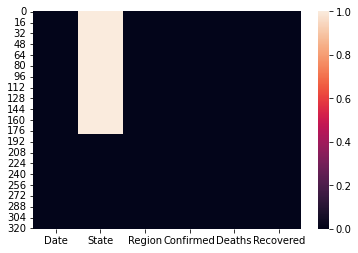

In [8]:
sns.heatmap(data.isnull())

# Show the number of confirmed deaths and recovered cases in each region

In [9]:
data.groupby('Region').sum().head(3)

,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702


In [10]:
data.groupby('Region')['Confirmed'].sum().sort_values(ascending=False).head()

Region
US        1039909
Spain      236899
Italy      203591
France     166543
UK         166441
Name: Confirmed, dtype: int64

In [11]:
data.groupby('Region')['Recovered'].sum().head(9)

Region
Afghanistan             252
Albania                 455
Algeria                1702
Andorra                 423
Angola                    7
Antigua and Barbuda      11
Argentina              1192
Armenia                 900
Australia              5715
Name: Recovered, dtype: int64

# Remove all the records where confirmed cases is less than 10

In [12]:
data.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


In [13]:
data.shape

(321, 6)

In [14]:
data.Confirmed < 10

0      False
1      False
2      False
3      False
4      False
       ...  
316    False
317    False
318    False
319    False
320    False
Name: Confirmed, Length: 321, dtype: bool

In [15]:
data[data.Confirmed<10]

,Date,State,Region,Confirmed,Deaths,Recovered
18,4/29/2020,NaN,Bhutan,7,0,5
98,4/29/2020,NaN,MS Zaandam,9,2,0
105,4/29/2020,NaN,Mauritania,8,1,6
126,4/29/2020,NaN,Papua New Guinea,8,0,0
140,4/29/2020,NaN,Sao Tome and Principe,8,0,4
177,4/29/2020,NaN,Western Sahara,6,0,5
178,4/29/2020,NaN,Yemen,6,0,1
184,4/29/2020,Anguilla,UK,3,0,3
192,4/29/2020,"Bonaire, Sint Eustatius and Saba",Netherlands,5,0,0
194,4/29/2020,British Virgin Islands,UK,6,1,3


In [16]:
data[~(data.Confirmed<10)]

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7
...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
318,4/29/2020,Yukon,Canada,11,0,0
319,4/29/2020,Yunnan,Mainland China,185,2,181


In [17]:
data = data[~(data.Confirmed<10)]

# in which region maximum number of confirmed cases were recorded

In [18]:
data.groupby('Region')['Confirmed'].sum().sort_values(ascending=False).head(10)

Region
US                1039909
Spain              236899
Italy              203591
France             166536
UK                 166432
Germany            161539
Turkey             117589
Russia              99399
Iran                93657
Mainland China      82861
Name: Confirmed, dtype: int64

# in which region minimum number of dead cases were recorded

In [19]:
data.groupby('Region')['Deaths'].sum().sort_values(ascending=True).head(10)

Region
Cambodia                    0
Seychelles                  0
Saint Lucia                 0
Central African Republic    0
Saint Kitts and Nevis       0
South Sudan                 0
Rwanda                      0
Grenada                     0
Macau                       0
Madagascar                  0
Name: Deaths, dtype: int64

#  How many Confirmed , Deaths & Recovered cases were reported from India till 29 April 2020 ?

In [20]:
data[data.Region == 'India']

,Date,State,Region,Confirmed,Deaths,Recovered
74,4/29/2020,NaN,India,33062,1079,8437


#  Sort the entire data wrt No. of Confirmed cases in ascending order.

In [21]:
data.sort_values( by = ['Confirmed'] , ascending = True).head(50)

,Date,State,Region,Confirmed,Deaths,Recovered
156,4/29/2020,NaN,Suriname,10,1,8
70,4/29/2020,NaN,Holy See,10,0,2
59,4/29/2020,NaN,Gambia,10,1,8
318,4/29/2020,Yukon,Canada,11,0,0
217,4/29/2020,Greenland,Denmark,11,0,11
256,4/29/2020,Montserrat,UK,11,1,2
144,4/29/2020,NaN,Seychelles,11,0,6
27,4/29/2020,NaN,Burundi,11,1,4
306,4/29/2020,Turks and Caicos Islands,UK,12,1,5
118,4/29/2020,NaN,Nicaragua,13,3,7


# Sort the entire data wrt No. of Recovered cases in descending order.

In [22]:
data.sort_values( by = ['Recovered'] , ascending = False).head(50)

,Date,State,Region,Confirmed,Deaths,Recovered
153,4/29/2020,NaN,Spain,236899,24275,132929
61,4/29/2020,NaN,Germany,161539,6467,120400
76,4/29/2020,NaN,Iran,93657,5957,73791
80,4/29/2020,NaN,Italy,203591,27682,71252
229,4/29/2020,Hubei,Mainland China,68128,4512,63616
57,4/29/2020,NaN,France,165093,24087,48228
167,4/29/2020,NaN,Turkey,117589,3081,44040
22,4/29/2020,NaN,Brazil,79685,5513,34132
158,4/29/2020,NaN,Switzerland,29407,1716,22600
78,4/29/2020,NaN,Ireland,20253,1190,13386
